# Pymaceuticals Inc.
---

### Analysis

- Male mice were tested in a slightly higher percentage than females (51% vs 49%).
- Capomulin and Ramicane showed the largest test groups (around 250 each) while Propriva showed the smallest group with around 150.
- The Capomulin and Ramicane studies showed the lowest tumor growth of the ten drugs tested.
- The Ketapril study showed the largest tumors in the set, with a mean of 55.24 and a median of 53.70.
- Infubinol, Ceftamin, Capomulin, and Ramicane show fairly normal distributions in final tumor sizes with only one outlier measured in Infubinol.
- The Capomulin study shows a relatively direct correlation between mouse weight and tumor volume, with a correlation coefficient of .88.


In [357]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import operator
from collections import Counter 
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")

# Display the data table for preview
mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [358]:
# Checking the number of mice.
mice = mouse_study_df["Mouse ID"].unique()
len(mice)


249

In [359]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
mouse_duplicates = mouse_study_df[mouse_study_df.loc[:, ["Mouse ID", "Timepoint"]].duplicated()]
mouse_duplicates_data = mouse_duplicates["Mouse ID"].unique()
mouse_duplicates_data


array(['g989'], dtype=object)

In [360]:
# Optional: Get all the data for the duplicate mouse ID.
temp =[]
for x in range(0, len(mouse_duplicates_data)):
    temp.append(mouse_duplicates_data[x])
mouse_dup = temp[0]
mouse_duplicates_df = mouse_study_df.loc[mouse_study_df['Mouse ID'] == mouse_dup]

mouse_duplicates_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [361]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_df.drop_duplicates()
clean_mouse_study_df = mouse_study_df[mouse_study_df["Mouse ID"] != mouse_dup]
clean_mouse_study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [362]:
# Checking the number of mice in the clean DataFrame.
mice = len(clean_mouse_study_df["Mouse ID"].unique())
mice

248

## Summary Statistics

In [363]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mean_calc = clean_mouse_study_df.groupby("Drug Regimen").mean()
mean = mean_calc["Tumor Volume (mm3)"]

median_calc = clean_mouse_study_df.groupby("Drug Regimen").median()
median = median_calc["Tumor Volume (mm3)"]

var_calc = clean_mouse_study_df.groupby("Drug Regimen").var()
var = var_calc["Tumor Volume (mm3)"]

std_calc = clean_mouse_study_df.groupby("Drug Regimen").std()
std = std_calc["Tumor Volume (mm3)"]

sem_calc = clean_mouse_study_df.groupby("Drug Regimen").sem()
sem = sem_calc["Tumor Volume (mm3)"]

summary_statistics_table = pd.DataFrame({"Mean Tumor Volume": mean, "Median Tumor Volume": median,
                                         "Tumor Volume Variance": var, "Tumor Volume Std. Dev.": std, 
                                         "Tumor Volume Std. Err.": sem})
summary_statistics_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [364]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line.

summary_statistics_agg = pd.DataFrame({"mean": clean_mouse_study_df.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"],
                                       "median":clean_mouse_study_df.groupby("Drug Regimen").median()["Tumor Volume (mm3)"],
                                       "var": clean_mouse_study_df.groupby("Drug Regimen").var()["Tumor Volume (mm3)"],
                                       "std": clean_mouse_study_df.groupby("Drug Regimen").std()["Tumor Volume (mm3)"],
                                       "sem": clean_mouse_study_df.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]})
summary_statistics_agg 


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

In [365]:
drugs = [drug for drug in clean_mouse_study_df["Drug Regimen"]]

drugs_count = Counter(drugs)

drugs_count_series = pd.Series(drugs_count)
drugs_count_series = drugs_count_series.sort_values(ascending=False)



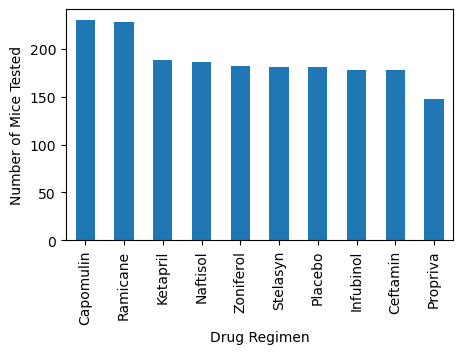

In [366]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

drugs_count_series.plot(kind="bar", figsize=(5,3))

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.show()

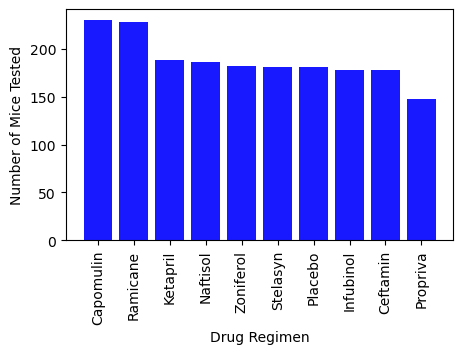

In [367]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.


x_axis = np.arange(len(drugs_count_series))
tick_locations = [value for value in x_axis]

plt.figure(figsize=(5,3))
plt.bar(x_axis, drugs_count_series, color='blue', alpha=.9, align="center")

plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

plt.xticks(tick_locations, drugs_count_series.keys(), rotation='vertical')
plt.tight_layout
plt.show()


In [368]:
sex = [sex for sex in clean_mouse_study_df["Sex"]]

sex_count = Counter(sex)

sex_count_series = pd.Series(sex_count)

labels = ['Female','Male']
colors = ['Orange', 'Blue']

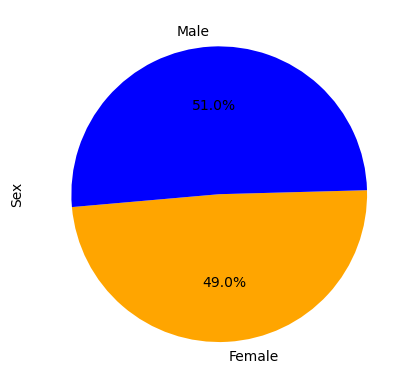

In [369]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

sex_count_series.plot(kind="pie", autopct="%1.1f%%", startangle=185, colors=colors)
plt.ylabel("Sex")
plt.show()

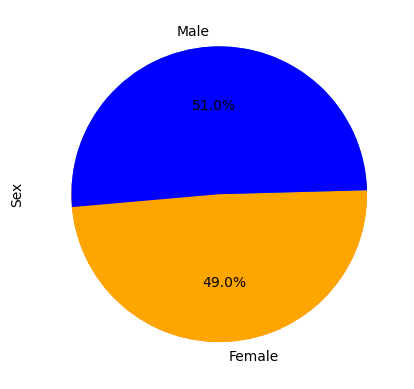

In [370]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ['Female','Male']
colors = ['Orange', 'Blue']

plt.pie(sex_count_series)
plt.pie(sex_count_series, labels=labels, colors=colors,
        autopct="%1.1f%%", startangle=185)
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [371]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

clean_mouse_study_sorted = clean_mouse_study_df.sort_values(by = ['Mouse ID','Timepoint'], 
                                                            ascending = [True,True])

clean_mouse_study_sorted_short = clean_mouse_study_sorted.groupby('Mouse ID').tail(1)

clean_mouse_study_sorted_four_drug = clean_mouse_study_sorted_short.loc[(clean_mouse_study_sorted['Drug Regimen'] == 'Capomulin') | 
                                                                  (clean_mouse_study_sorted['Drug Regimen'] == 'Ramicane') |
                                                                  (clean_mouse_study_sorted['Drug Regimen'] == 'Infubinol') |
                                                                  (clean_mouse_study_sorted['Drug Regimen'] == 'Ceftamin') ]


clean_mouse_study_sorted_four_drug = clean_mouse_study_sorted_four_drug.reset_index()

In [372]:
# Put treatments into a list for for loop (and later for plot labels)
drug_list = [drug for drug in clean_mouse_study_sorted_four_drug['Drug Regimen']]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_df = clean_mouse_study_sorted_four_drug.loc[clean_mouse_study_sorted_four_drug['Drug Regimen'] == 'Capomulin']
ramicane_df = clean_mouse_study_sorted_four_drug.loc[clean_mouse_study_sorted_four_drug['Drug Regimen'] == 'Ramicane']
infubinol_df = clean_mouse_study_sorted_four_drug.loc[clean_mouse_study_sorted_four_drug['Drug Regimen'] == 'Infubinol']
ceftamin_df = clean_mouse_study_sorted_four_drug.loc[clean_mouse_study_sorted_four_drug['Drug Regimen'] == 'Ceftamin']

#Quartiles Total 
quartiles_total = clean_mouse_study_sorted_four_drug['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lower_quartile_total = quartiles_total[0.25]
upper_quartile_total = quartiles_total[0.75]
iqr_total = upper_quartile_total - lower_quartile_total
lowerbound_total = lower_quartile_total - (1.5 * iqr_total)
upperbound_total = upper_quartile_total + (1.5 * iqr_total)

#Quartiles Capomulin
quartiles_capomulin = capomulin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lower_quartile_capomulin = quartiles_capomulin[0.25]
upper_quartile_capomulin = quartiles_capomulin[0.75]
iqr_capomulin = upper_quartile_capomulin - lower_quartile_capomulin
lowerbound_capomulin = lower_quartile_capomulin - (1.5 * iqr_capomulin)
upperbound_capomulin = upper_quartile_capomulin + (1.5 * iqr_capomulin)
outliers_capomulin = capomulin_df.loc[(capomulin_df['Tumor Volume (mm3)'] < lowerbound_capomulin) | 
                                       (capomulin_df['Tumor Volume (mm3)']> upperbound_capomulin)]

#Quartiles Ramicane
quartiles_ramicane = ramicane_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lower_quartile_ramicane = quartiles_ramicane[0.25]
upper_quartile_ramicane = quartiles_ramicane[0.75]
iqr_ramicane = upper_quartile_ramicane - lower_quartile_ramicane
lowerbound_ramicane = lower_quartile_ramicane - (1.5 * iqr_ramicane)
upperbound_ramicane = upper_quartile_ramicane + (1.5 * iqr_ramicane)
outliers_ramicane = ramicane_df.loc[(ramicane_df['Tumor Volume (mm3)'] < lowerbound_ramicane) | 
                                       (ramicane_df['Tumor Volume (mm3)']> upperbound_ramicane)]
#Quartiles Infubinol
quartiles_infubinol = infubinol_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lower_quartile_infubinol = quartiles_infubinol[0.25]
upper_quartile_infubinol = quartiles_infubinol[0.75]
iqr_infubinol = upper_quartile_infubinol - lower_quartile_infubinol
lowerbound_infubinol = lower_quartile_infubinol - (1.5 * iqr_infubinol)
upperbound_infubinol = upper_quartile_infubinol + (1.5 * iqr_infubinol)
outliers_infubinol = infubinol_df.loc[(infubinol_df['Tumor Volume (mm3)'] < lowerbound_infubinol) | 
                                       (infubinol_df['Tumor Volume (mm3)']> upperbound_infubinol)]
#Quartiles Ceftamin
quartiles_ceftamin = ceftamin_df['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lower_quartile_ceftamin = quartiles_ceftamin[0.25]
upper_quartile_ceftamin = quartiles_ceftamin[0.75]
iqr_ceftamin = upper_quartile_ceftamin - lower_quartile_ceftamin
lowerbound_ceftamin = lower_quartile_ceftamin - (1.5 * iqr_ceftamin)
upperbound_ceftamin = upper_quartile_ceftamin + (1.5 * iqr_ceftamin)
outliers_ceftamin = ceftamin_df.loc[(ceftamin_df['Tumor Volume (mm3)'] < lowerbound_ceftamin) | 
                                       (ceftamin_df['Tumor Volume (mm3)']> upperbound_ceftamin)]

print(f"Capomulin's potential outliers: {outliers_capomulin['Tumor Volume (mm3)']}")
print(f"Ramicane's potential outliers:{outliers_ramicane['Tumor Volume (mm3)']}")
print(f"Infubinol's potential outliers: {outliers_infubinol['Tumor Volume (mm3)']}")
print(f"Ceftamin's potential outliers:{outliers_ceftamin['Tumor Volume (mm3)']}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers:Series([], Name: Tumor Volume (mm3), dtype: float64)


In [373]:
all_df = pd.DataFrame({"Capomulin": capomulin_df['Tumor Volume (mm3)'],
                      "Ramicane": ramicane_df['Tumor Volume (mm3)'],
                      "Infubinol": infubinol_df['Tumor Volume (mm3)'],
                      "Ceftamin": ceftamin_df['Tumor Volume (mm3)']})


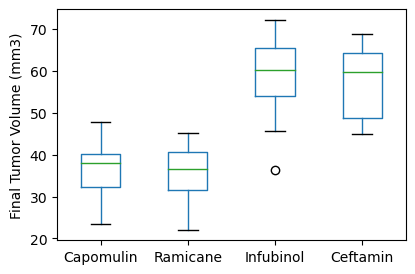

In [374]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
all_df.boxplot(grid=False, figsize=(4.5,3))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()                                                           

## Line and Scatter Plots

In [375]:
clean = clean_mouse_study_sorted.loc[clean_mouse_study_sorted['Mouse ID']=='l509']


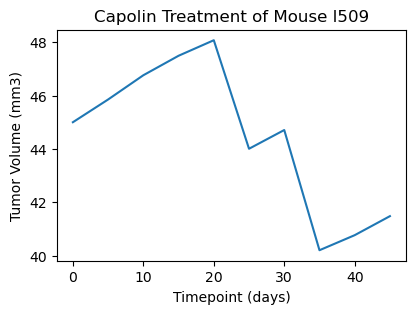

In [376]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
clean.plot.line('Timepoint','Tumor Volume (mm3)', legend=False, figsize=(4.5,3))
plt.title('Capolin Treatment of Mouse l509')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Timepoint (days)')
plt.show()

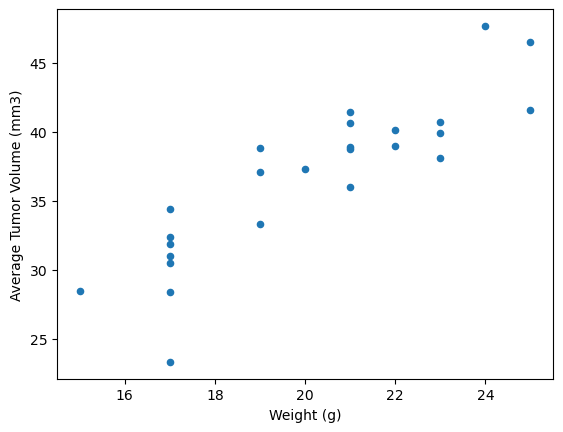

In [377]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
capomulin_df.plot.scatter('Weight (g)','Tumor Volume (mm3)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()

## Correlation and Regression

The correlation coefficient between mouse weight and the average tumor volume is 0.88.


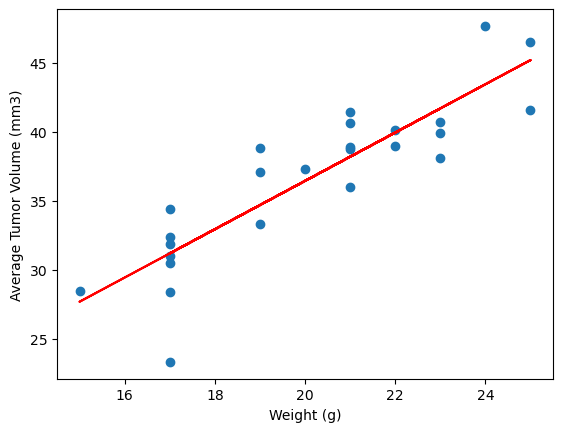

In [378]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

x = capomulin_df['Weight (g)']
y = capomulin_df['Tumor Volume (mm3)']
(m, b, r, p, se) = linregress(x, y)
regression = m * x + b
corr_coef = round(st.pearsonr(x,y)[0],2)
print(f"The correlation coefficient between mouse weight and the average tumor volume is {corr_coef}.")
line = "y = " + str(round(m,2)) + "x + " + str(round(b,2))
plt.scatter(x,y)
plt.plot(x,regression,"r-")
#plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()


